In [1]:
import operator
import os
import warnings
import random
import imageio
import glob
import scipy
import seaborn as sns
from tqdm import tqdm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
random.seed(20)

from templates import *
from templates_cls import *
from dataset import BaseLMDB

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
class PatchDataset(Dataset):
    def __init__(self, path_to_images, fold='test', sample=0, transform=None):
        self.transform = transform
        self.path_to_images = path_to_images
        self.df = pd.read_csv('labels/uka_chest.csv')
        self.df = self.df[self.df['split'] == fold]
        if(sample > 0 and sample < len(self.df)):
            self.df = self.df.sample(frac=sample, random_state=42)
            print('subsample the training set with ratio %f' % sample)
        self.df = self.df.sort_values(by=['Anforderungsnummer'])
        self.df = self.df.set_index('Anforderungsnummer')
        self.PRED_LABEL = ['Infiltrate_li',
                      'Infiltrate_re', 'Herzgröße', 'Stauung', 'Pleuraerguss_re',
                      'Pleuraerguss_li', 'Belstörungen_re', 'Belstörungen_li',]

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        image = Image.open(
            os.path.join(self.path_to_images, str(self.df.index[idx])+'.jpg')
            )
        image = image.convert('RGB')
        label = np.zeros(len(self.PRED_LABEL), dtype=int)
        for i in range(0, len(self.PRED_LABEL)):
            if(self.df[self.PRED_LABEL[i].strip()].iloc[idx].astype('int') > 0):
                label[i] = self.df[self.PRED_LABEL[i].strip()].iloc[idx].astype('int')
        if self.transform:
            image = self.transform(image)

        return (image, label)


tr_dataset = PatchDataset(path_to_images='/data/UKA_CHEST/UKA_preprocessed_all/',
                        fold='train',
                        transform=transforms.Compose([
                            transforms.Resize(256),
                            transforms.CenterCrop(256),
                            transforms.ToTensor(),
                            transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                            ]))

(8,)

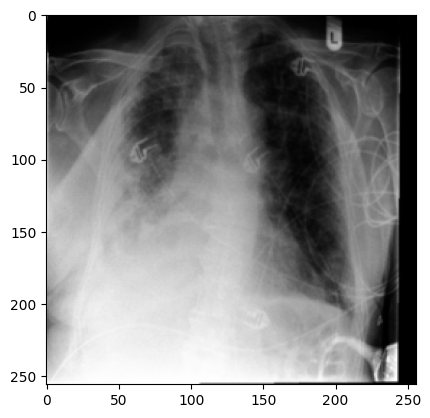

In [3]:
idx = 1000
batch, label = tr_dataset[idx][0], tr_dataset[idx][1]
label.shape
plt.imshow(batch[0], cmap='gray')

In [5]:
label
np.where(label > 0.1, 1, 0)

array([2, 3, 0, 1, 3, 1, 3, 2])

array([1, 1, 0, 1, 1, 1, 1, 1])

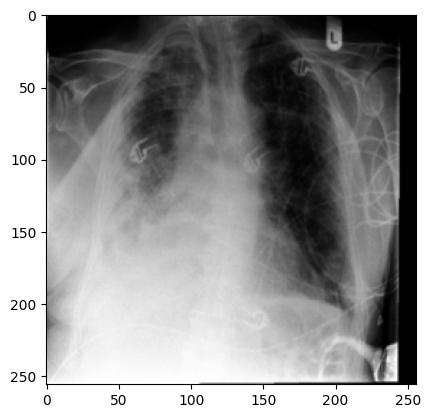

In [15]:
data = BaseLMDB('/data/home/than/LMDB/uka_icu/256/', 256, zfill=5)
batch = data[idx]
plt.imshow(np.asarray(batch), cmap='gray')

In [22]:
path = '/data/UKA_CHEST/UKA_preprocessed_all/UKA_dataset_all_splits.csv'
df = pd.read_csv(path)
df = df.filter(items=['Anforderungsnummer', 'Infiltrate_li',
                      'Infiltrate_re', 'Herzgröße', 'Stauung', 'Pleuraerguss_re',
                      'Pleuraerguss_li', 'Belstörungen_re', 'Belstörungen_li',
                      'split'])
# df = df[df['split'] == 'test']
df.head()
len(df)
df.to_csv('/data/home/than/Git/diffae_med/labels/uka_chest.csv', index=None)

/home/than/anaconda3/envs/diffae/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3269: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Anforderungsnummer,Infiltrate_li,Infiltrate_re,Herzgröße,Stauung,Pleuraerguss_re,Pleuraerguss_li,Belstörungen_re,Belstörungen_li,split
0,9030756101,0.0,0.0,3.0,2.0,3.0,3.0,2.0,3.0,train
1,9029338901,0.0,2.0,3.0,2.0,2.0,1.0,2.0,2.0,train
2,9029505201,1.0,1.0,3.0,1.0,0.0,0.0,1.0,1.0,train
3,9029413201,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,train
4,9029540101,1.0,2.0,0.0,1.0,0.0,0.0,1.0,1.0,train


193566

/tmp/ipykernel_742658/1774427818.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  _ = plt.imshow(imageio.imread(glob.glob('/data/UKA_CHEST/UKA_preprocessed_all/9029537701.jpg')[0]), cmap='gray')


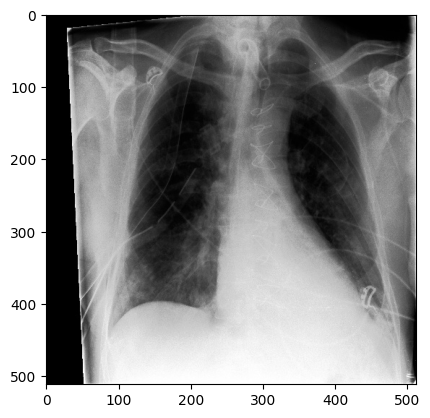

In [20]:
_ = plt.imshow(imageio.imread(glob.glob('/data/UKA_CHEST/UKA_preprocessed_all/9029537701.jpg')[0]), cmap='gray')